### Introduction

#### This competition is about identifying the customers who are highly interested in recommended credit cards. The customer's interests in recommended credit cards will be identified based on the customer account details.

### Import Necessary Packages

In [1]:
!pip install plotnine==0.8.0

     |████████████████████████████████| 4.7MB 6.8MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 27.4MB 137kB/s 
     |████████████████████████████████| 9.5MB 36.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: mizani 0.6.0
    Uninstalling mizani-0.6.0:
      Successfully uninstalled mizani-0.6.0
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: plotnine 0.6.0
    Uninstalling plotnine-0.6.0:
      Successfully uninstalled plotnine-0.6.0


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import statistics as st

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/job a thon may 2021

/content/gdrive/MyDrive/job a thon may 2021


### Import Train and Test Dataset


In [5]:
train=pd.read_csv('train_s3TEQDk.csv')
test=pd.read_csv('test_mSzZ8RL.csv')

### Let's see structure of the train and test dataset

In [ ]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


#### The above information shows that there are nine features to predict the customer's interests in the recommended credit cards.   
#### In train dataset there are  245725 observations and 9 features and 1 target column.  

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB



#### The test dataset contains 105312 obsevations and 9 features.

### Let's see the glimpse of train and test dataset.

In [ ]:

train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:

test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No



### Let's see a statistical summary of the numerical columns in the train and test dataset.

#### Train data

In [ ]:
train.iloc[:,1:10].select_dtypes(include='int').describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


#### The above summary shows that the average age of the customers who are eligible to take credit cards is **43** and the minimum age is **23** and the maximum age is **85**.

#### Vintage is how long the eligible customers have been on the bank records.The average is **3 year 8 months** and the minimum is **7 months**, the maximum year is **11 years(135 months)**



#### Test data

In [ ]:
test.iloc[:,1:10].select_dtypes(include='int').describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


### Let's check if there are any missing values in train and test dataset by column wise.

In [ ]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

#### Both train and test dataset have missin values in Credit_Product column.

### Let's perform Exploratory data analysis.


#### First let's see the target column distribution.

#### The target column **Is_Lead** is in binary(0,1) format.Let's convert into **0-as Not_Interested** and **1-as Interested**.

In [6]:
target_encode={0:'Not_Interested',1:'Interested'}
train['Is_Lead']=train['Is_Lead'].map(target_encode)

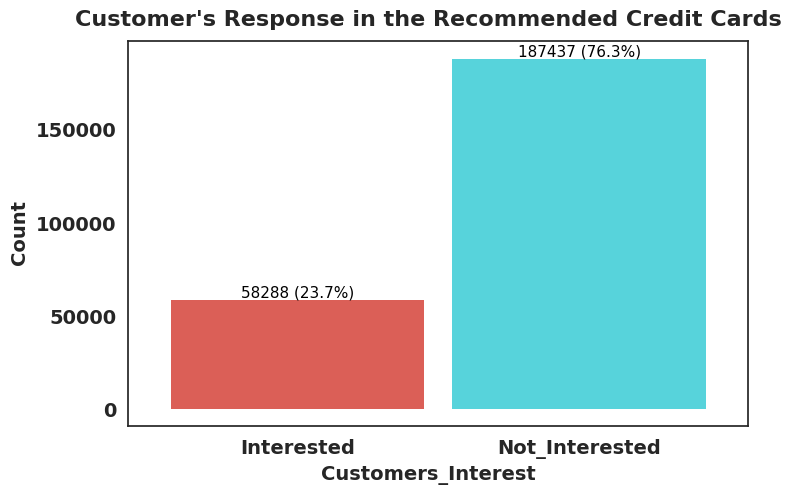

<ggplot: (8788478343085)>

In [7]:
def combine(counts, percentages):
    fmt = '{} ({:.1f}%)'.format
    return [fmt(c, p) for c, p in zip(counts, percentages)]

(ggplot(train,aes(x='Is_Lead',fill='Is_Lead'))+
geom_bar()+
geom_text(
aes(label=after_stat('combine(count, prop*100)'), group=1),
stat='count',
nudge_y=0.125,
va='bottom')+
labs(x='Customers_Interest',y='Count',title="Customer's Response in the Recommended Credit Cards")+
theme_seaborn(style='ticks')+
theme(figure_size=(8,5),
legend_position='none',      
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))



#### The above bar chart shows that the target column biased towards **one class(1-Not_Interested)** and clearly shows a class imbalance.

### Let's see gender wise customer's response on recommended credit cards.

In [ ]:
train['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

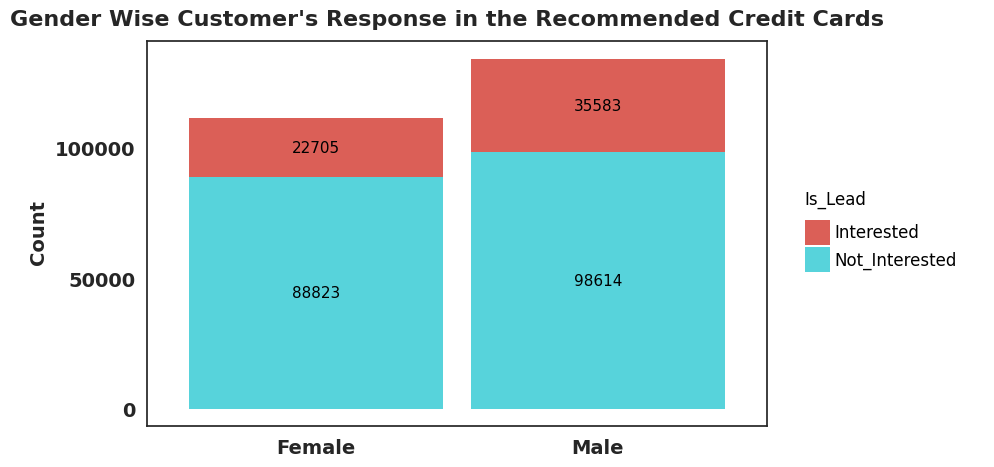

<ggplot: (8749877886929)>

In [ ]:

(ggplot(train,aes(x='Gender',fill='Is_Lead'))+
geom_bar()+
geom_text(
aes(label=after_stat('count')),
stat='count',position=position_stack(vjust=0.5))+
labs(x='',y='Count',title="Gender Wise Customer's Response in the Recommended Credit Cards")+
theme_seaborn(style='ticks')+
theme(figure_size=(8,5),
legend_position='right',      
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),    
axis_ticks=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [ ]:
f = lambda x: 100 * x / float(x.sum())
train.groupby(['Gender','Is_Lead'])['Is_Lead'].agg({'count'}).assign(Percentage=f).reset_index()

,Gender,Is_Lead,count,Percentage
0,Female,Interested,22705,9.240004
1,Female,Not_Interested,88823,36.147319
2,Male,Interested,35583,14.480822
3,Male,Not_Interested,98614,40.131855


#### The bar chart shows that male customers are highly interests in recommended credit cards when compare to female customers.
#### The percentage of customers not interested in the recommended policies is high in both genders.

### Let's see the Customer's age distribution

#### Function to find Inter-Quartile-Range

In [8]:
def iqr(x: [int,float])->[int,float]:
    """Inter_Quartile-Range.
    
    with the help of numpy percentile function we can get the 1st and 3rd quartile.
    Then subtract the 1st quartile value from 3rd quartile.
    
    parameters:
    -----------
    input: list of numerical values,array
    return: single nummerical value.
    """
    q1_x = np.percentile(x, 25, interpolation='midpoint')
    q3_x = np.percentile(x, 75, interpolation='midpoint')
    return q3_x - q1_x

#### Let's create a fuction to find a optimal bin width by using Freedman Diaconis Rule.

In [9]:
def bin_w(x: [int,float])->[int,float]:
    """
    with help of above iqr function we can get iqr value.
    Using the iqr value and the following freedman diaconis formula we can get optimal bin width.
    
    parametes:
    ----------
    input: list of numerical values,array
    return: single nummerical value.
    
    """
    bw=(2 * iqr(x)) / np.power(x.shape[0], 1/3)
    return bw

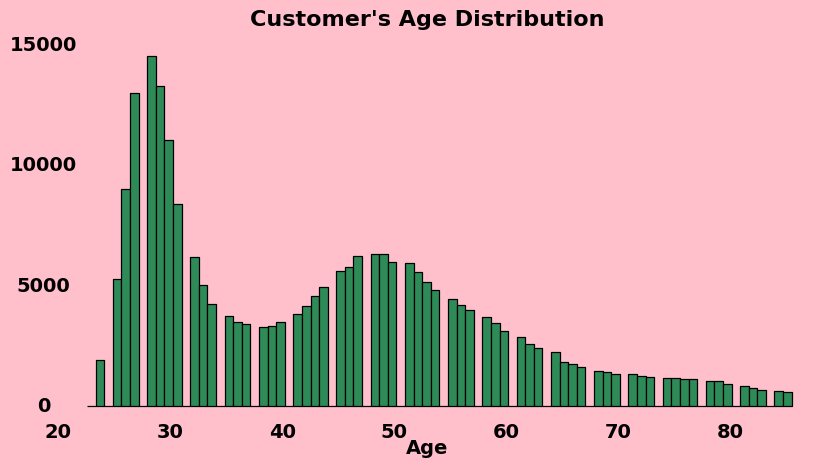

<ggplot: (8749877863397)>

In [ ]:
age_bw=bin_w(train['Age'])
(ggplot(train)+geom_histogram(aes(x='Age'),fill='seagreen',color='black',
                             binwidth=age_bw)+
scale_x_continuous(breaks=range(20,90,10))+ 
labs(y='',title="Customer's Age Distribution")+
theme_void()+
theme(figure_size=(10,5),
panel_grid=element_blank(),
axis_ticks=element_blank(), 
plot_background=element_rect(fill='pink'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))


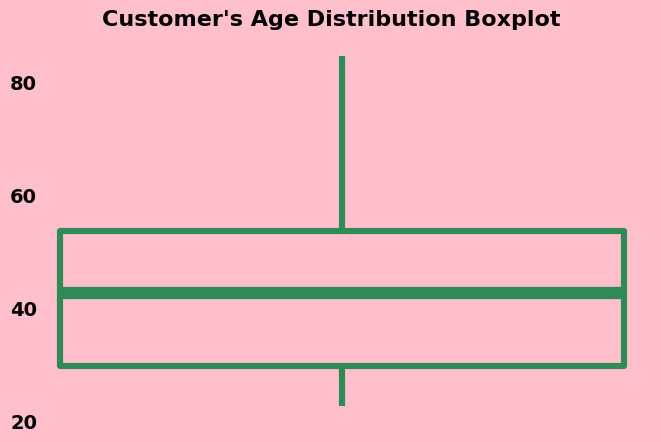

<ggplot: (8749877832641)>

In [ ]:
age_bw=bin_w(train['Age'])
(ggplot(train,aes(x='0',y='Age'))+
geom_boxplot(color='seagreen',fill='none',size=2.5)+
labs(x='',y='',title="Customer's Age Distribution Boxplot")+
theme_void()+
theme(figure_size=(8,5),
panel_grid=element_blank(),
axis_ticks=element_blank(), 
plot_background=element_rect(fill='pink'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_y=element_text(style='normal',size=14,weight='bold'),
axis_text_x=element_blank(),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [ ]:
print("The Customer's Age Median is:",train['Age'].median())

The Median is: 43.0


In [ ]:
print("The Customer's Age Mode is:",st.mode(train['Age']))

The Mode is: 28


In [16]:
print("Customer's Age Summary\n",train['Age'].describe())

Customer's Age Summary
 count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64


#### The above histogram shows that the customer's age distribution looks normal and there is no skew. There are two peaks at the **age 30 and 50**.

#### The boxplot shows there are **no ouliers**.

#### The **mean and median are equal** so the distribution is **symmetric and zero skewness**.

#### Most customers who are eligible to get credit cards are in the age range of **24 to 30**.

### Let's see if there is any difference in customer age distribution and their responses on recommended credit card categories.

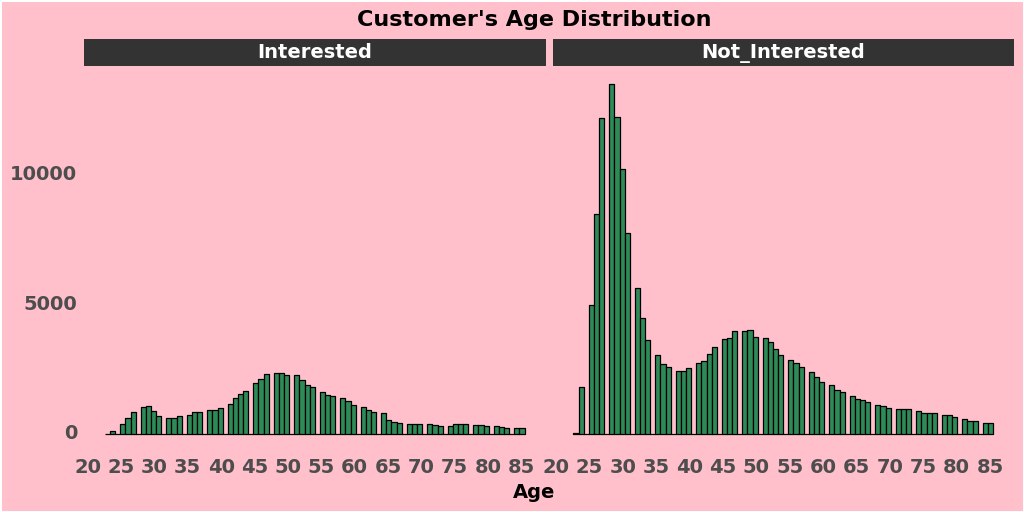

<ggplot: (8749886847937)>

In [ ]:
age_bw=bin_w(train['Age'])
(ggplot(train,aes(x='Age'))+
       geom_histogram(fill='seagreen',color='black',
                             binwidth=age_bw)+
scale_x_continuous(breaks=range(20,90,5))+ 
labs(y='',title="Customer's Age Distribution")+
facet_wrap('Is_Lead')+ 
theme_dark()+
theme(figure_size=(12,5),
panel_grid=element_blank(),
axis_ticks=element_blank(), 
plot_background=element_rect(fill='pink'), 
panel_background=element_rect(fill='none'),   
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))


#### The above histogram explains that the customers who are not interested in the recommended credit card options, in that most of them are in the age range of **27 to 30**.

#### **45 to 55** age customer's shows higher interest in recommended credit card options when compare to the other age range customers.

#### Let's create a categorical group from customer age column 

In [17]:
train['age_bin']=pd.cut(train['Age'],bins=7,labels=['22-31','31-40','40-49','49-58','58-67','67-76','76-85'])

### Let's see if there are any differences between gender-wise customer's interest responses and customer's age category.

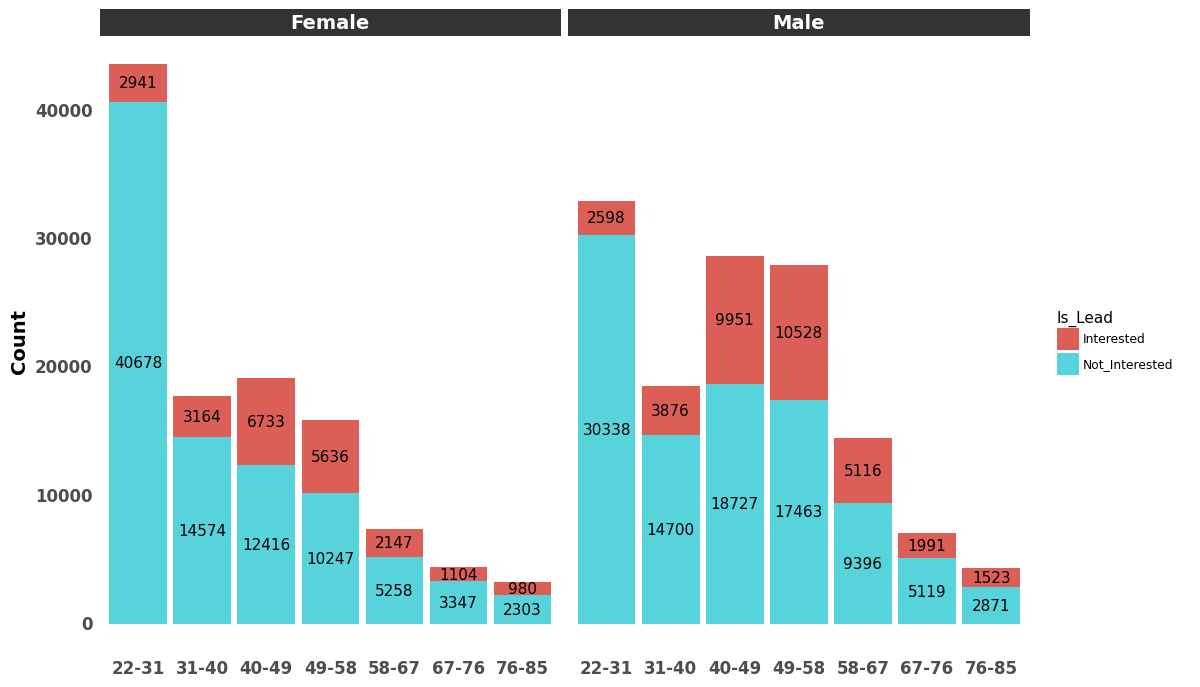

<ggplot: (8749877691825)>

In [ ]:
(ggplot(train,aes(x='age_bin',fill='Is_Lead'))+
geom_bar()+
geom_text(
aes(label=after_stat('count')),
stat='count',position=position_stack(vjust=0.5))+
labs(x='',y='Count')+
facet_wrap('Gender')+
theme_dark()+
theme(figure_size=(12,8),
legend_position='right',  
panel_grid=element_blank(),
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The stacked bar chart explains that both male and female customers who are in the age category of **40-49 and 49-58** are highly interested in recommended credit cards.

#### More customers of the bank are in the age range of **22 to 31**.

### Let's see how many regions are there and check region wise customer responses on recommended credit cards.

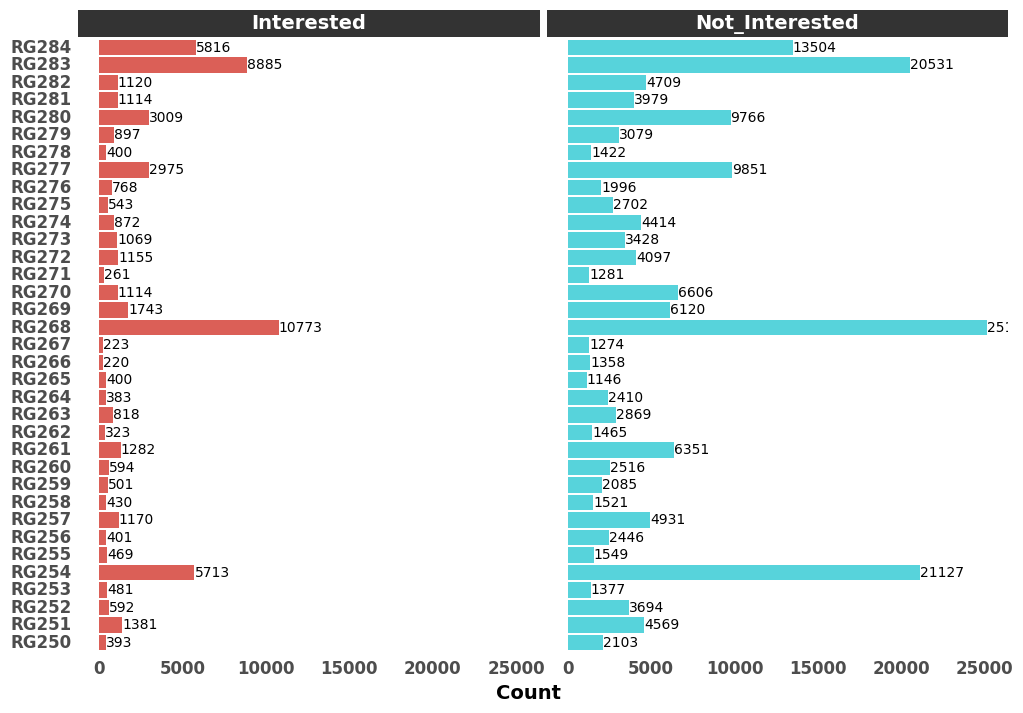

<ggplot: (8749876024249)>

In [ ]:
(ggplot(train,aes(x='Region_Code',fill='Is_Lead'))+
geom_bar(position='identity')+
geom_text(
aes(label=after_stat('count')),ha='left',size=10,
stat='count',position=position_identity())+
labs(x='',y='Count')+
facet_wrap('Is_Lead')+
theme_dark()+
theme(figure_size=(12,8),
legend_position='none',  
panel_grid=element_blank(),
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold'))+coord_flip())

#### The above chart shows that the customers from the region **254,268,283,284** are shown higher interest in recommended credit card. even though, the same regions have more numbers of uninterested customers.

### Let's see Region-wise gender distribution.

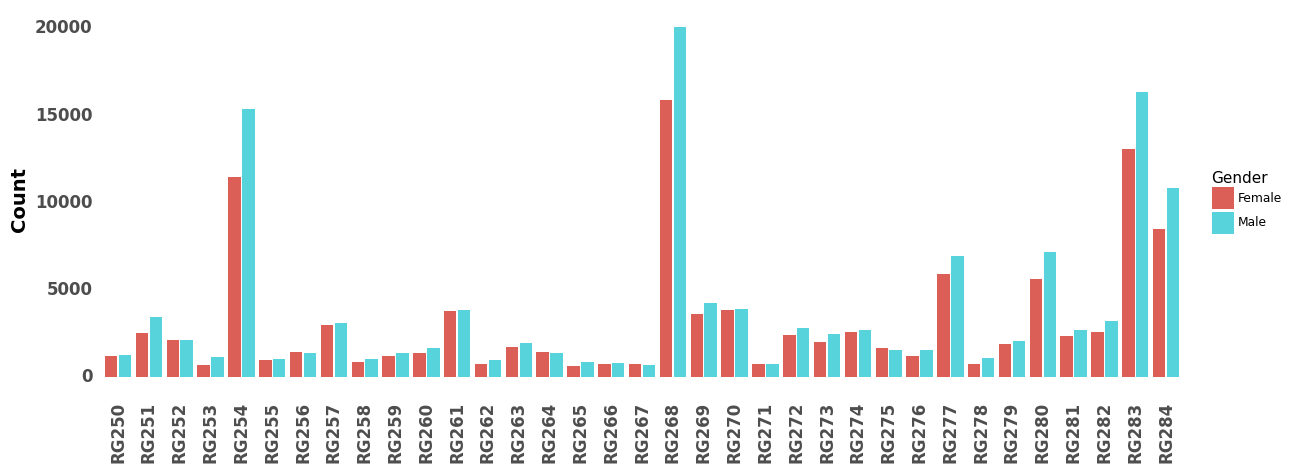

<ggplot: (8749887074261)>

In [ ]:
(ggplot(train,aes(x='Region_Code',fill='Gender'))+
geom_bar(position='dodge2')+
labs(x='',y='Count')+
#facet_wrap('Is_Lead',ncol=1,scales='free')+
theme_dark()+
theme(figure_size=(14,5),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=90),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))


In [ ]:
#function to highlight the maximum number
def highlight_max(x):
    return ['background-color: lightgreen' if v == x.max() else ''
                for v in x]


In [ ]:
train.groupby(['Region_Code','Gender'])['Gender'].agg({'count'}).reset_index().pivot_table(index='Gender', 
                    columns='Region_Code', 
                    values='count').style.apply(highlight_max)

Region_Code,RG250,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,1226,2514,2153,722,11456,982,1471,2997,893,1204,1414,3793,774,1718,1418,658,771,781,15884,3595,3826,776,2403,1991,2600,1660,1216,5900,738,1894,5603,2386,2585,13052,8474
Male,1270,3436,2133,1136,15384,1036,1376,3104,1058,1382,1696,3840,1014,1969,1375,888,807,716,20050,4268,3894,766,2849,2506,2686,1585,1548,6926,1084,2082,7172,2707,3244,16364,10846


#### The above chart and table explains that the region **252,256,264,267,271,and 275** have more number of female customers.

### Let's see region-wise age distribution using boxplot

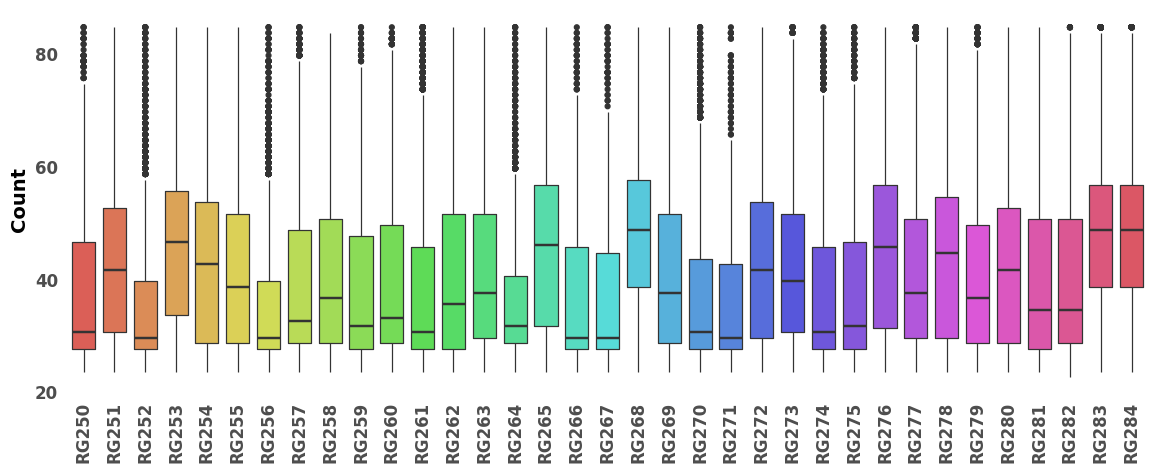

<ggplot: (8749875595949)>

In [ ]:
(ggplot(train,aes(x='Region_Code',y='Age',fill='Region_Code'))+
geom_boxplot()+
labs(x='',y='Count')+
#facet_wrap('Is_Lead',ncol=1,scales='free')+
theme_dark()+
theme(figure_size=(14,5),
legend_position='none',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=90),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold')))

#### The above boxplot explains that there is a significant differences between region and customer's age distribution.

#### There are outlier points in some regions.

### Let's see if customer's responses on recommended credit cards will be based on their occupations.

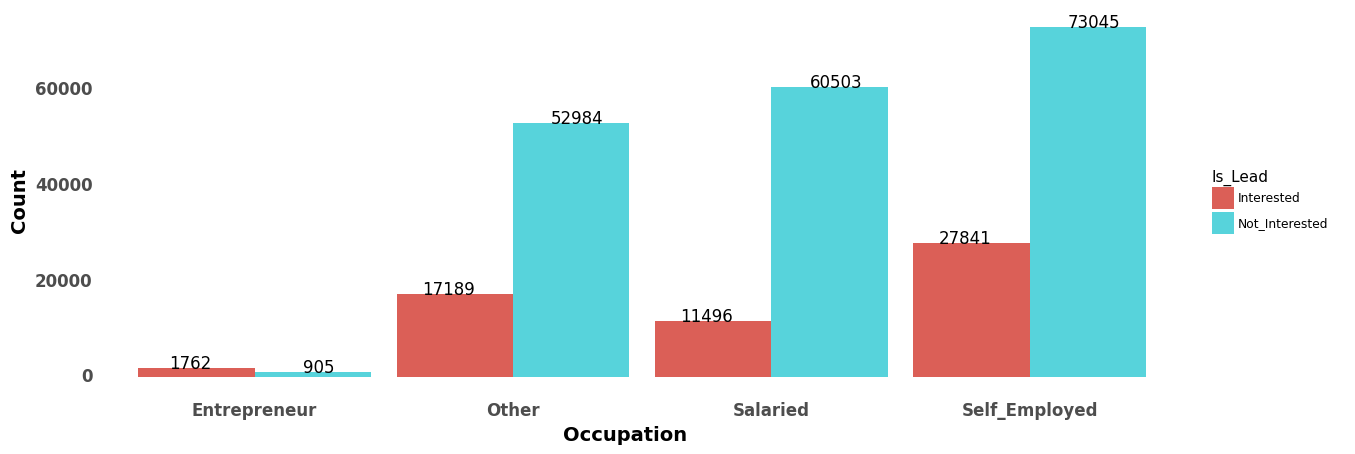

<ggplot: (8749887054409)>

In [ ]:
(ggplot(train,aes(x='Occupation',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=12,
stat='count',position=position_dodge(width=1))+
labs(x='Occupation',y='Count')+
#facet_wrap('Is_Lead',ncol=1,scales='free')+
theme_dark()+
theme(figure_size=(14,5),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold'),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold')))

#### The above bar chart explains that the customers who are self-employed and the customers who have other occupations are highly interested in recommended credit cards.
#### Most of the eligible customers are self-employed and salaried.

### Let's see if there are any differences in gender-wise occupation and responses to the recommended credit cards.

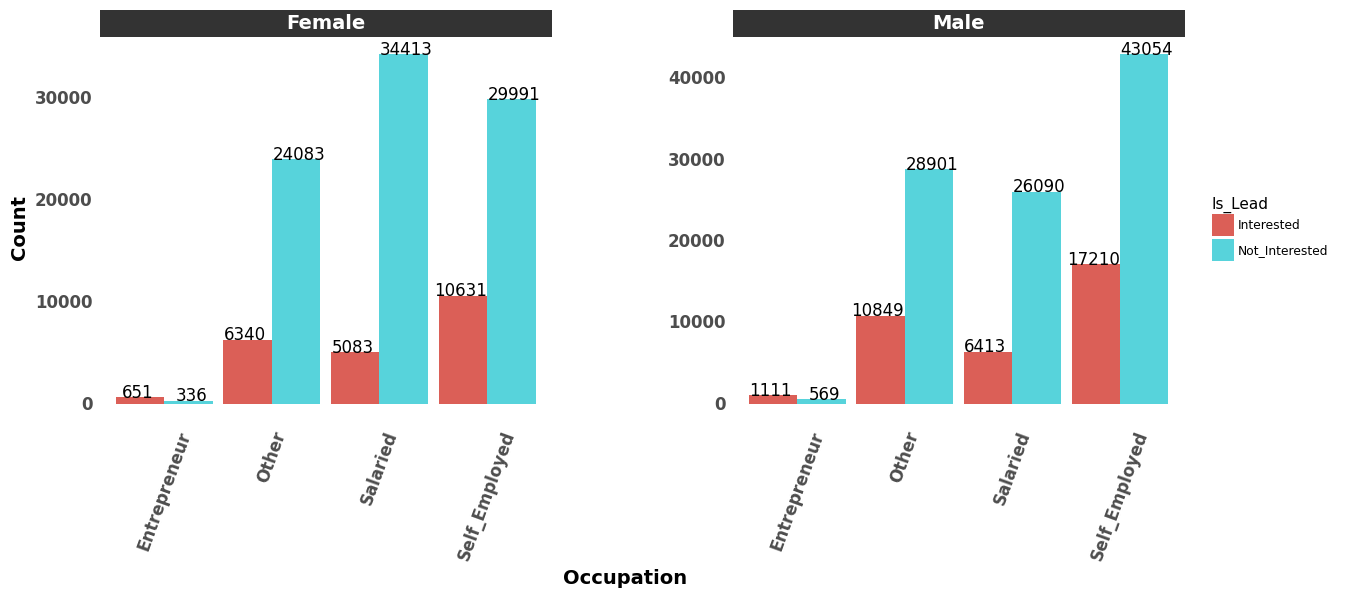

<ggplot: (8749875363001)>

In [ ]:
(ggplot(train,aes(x='Occupation',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=12,
stat='count',position=position_dodge(width=1))+
labs(x='Occupation',y='Count')+
facet_wrap('Gender',ncol=2,scales='free')+
theme_dark()+
theme(figure_size=(14,5),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above-stacked bar chart explains that most salaried customers are females and moreover less interested in recommended credit cards.

#### Self-employed and customers who are having other occupations are highly interested in recommended credit cards.

### Let's compare the age group and type of occupations and check customer's responses on recommended credit cards.

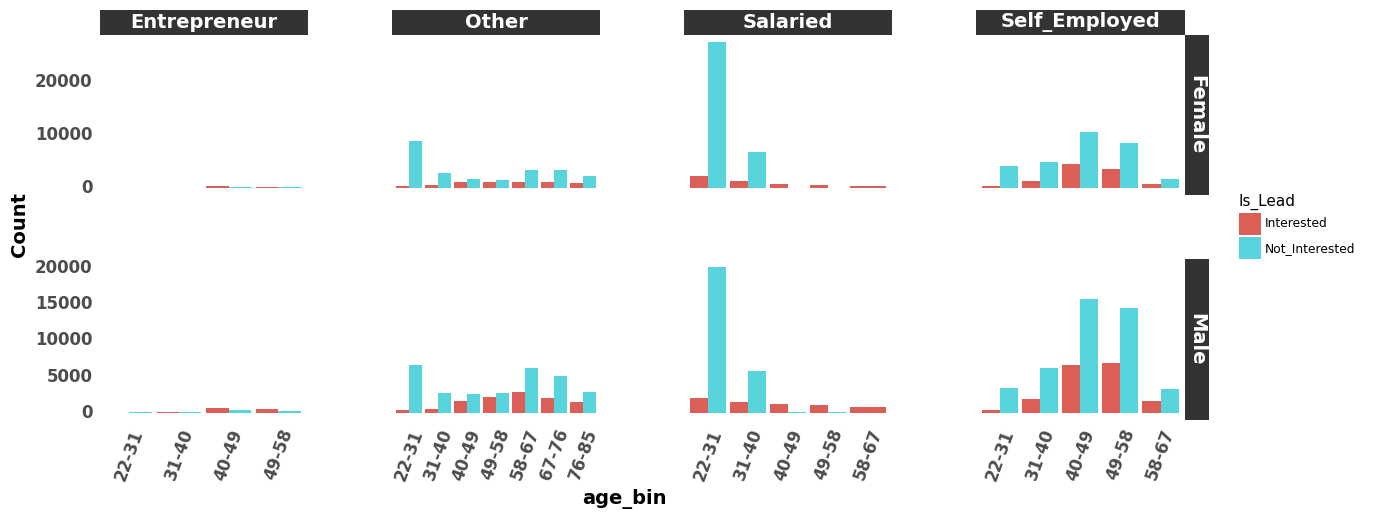

<ggplot: (8749875390841)>

In [ ]:
(ggplot(train,aes(x='age_bin',fill='Is_Lead'))+
geom_bar(position='dodge')+
labs(y='Count')+
facet_grid('Gender~Occupation',scales='free')+
theme_dark()+
theme(figure_size=(14,5),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))


In [ ]:
train.groupby(['Occupation','Gender','age_bin','Is_Lead',])['Is_Lead'].agg({'count'}).reset_index().pivot_table(index=['Gender','Is_Lead','Occupation'], 
                    columns=['age_bin']).style.apply(highlight_max)

#### The above bar chart and pivot table explains that most of the salaried customers are in the age range of **22-31**.

#### **40-49 and 49-58** age range customers are mostly **self-employed and interested in recommended credit cards**.

#### The age range of customers who are entrepreneurs is between **21-58** 

#### The customers who are older than **67** years and they are occupations not fall under the category of salaried, self-employed, and entrepreneur.


### Let's see Region-wise customers occupations.

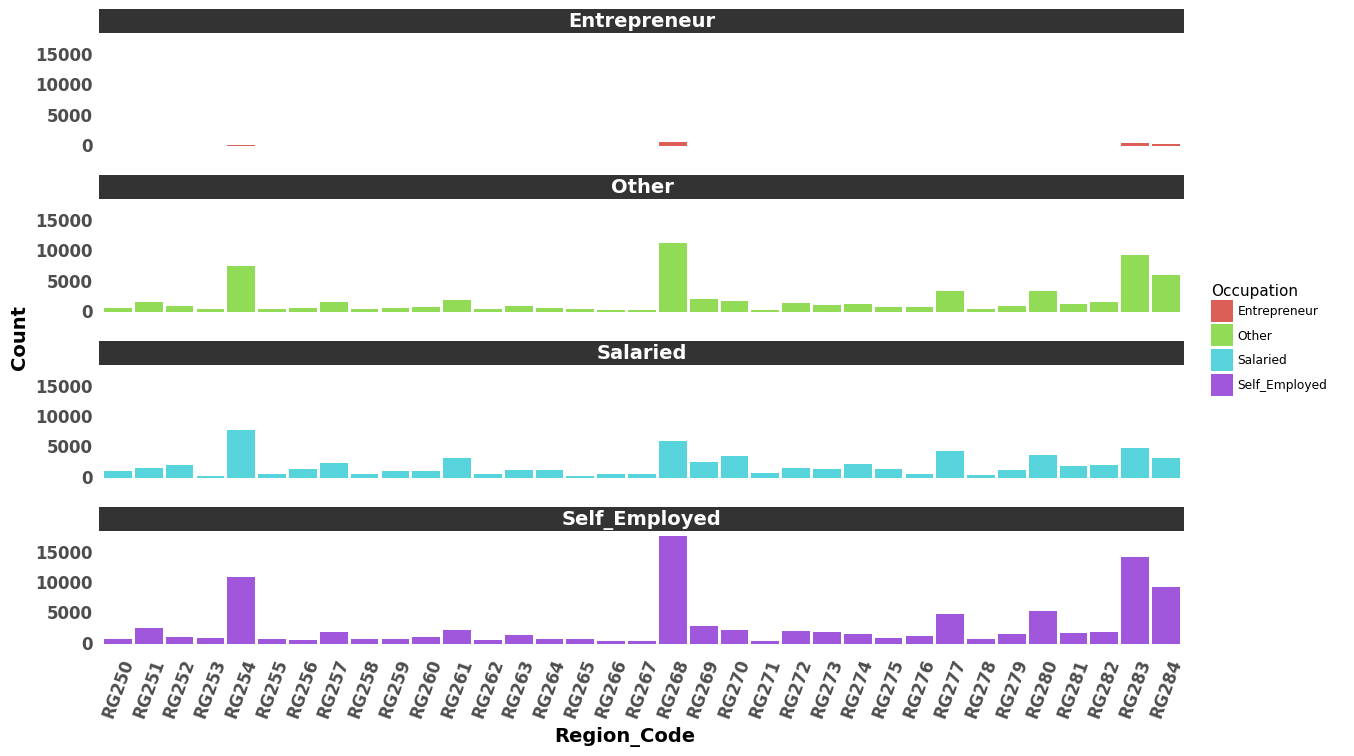

<ggplot: (8749875342029)>

In [ ]:
(ggplot(train,aes(x='Region_Code',fill='Occupation'))+
geom_bar()+
labs(y='Count')+
facet_wrap('Occupation',ncol=1)+
theme_dark()+
theme(figure_size=(14,8),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [ ]:
train.groupby(['Region_Code','Occupation'])['Occupation'].agg({'count'}).reset_index().pivot_table(index='Region_Code', 
                    columns=['Occupation'],values='count').style.apply(highlight_max)

Occupation,Entrepreneur,Other,Salaried,Self_Employed
Region_Code,,,,
RG250,7,648,1093,748
RG251,30,1690,1682,2548
RG252,15,1025,2129,1117
RG253,15,514,369,960
RG254,226,7637,7874,11103
RG255,25,569,694,730
RG256,12,697,1432,706
RG257,23,1638,2428,2012
RG258,14,487,683,767


#### Highest number of entrepreneurs customers are from the regions of 268 283, and 284.

#### Let's see how many various channels are used by customers to interact with the bank. Also, let see if there is any difference in customer responses based on those channels.

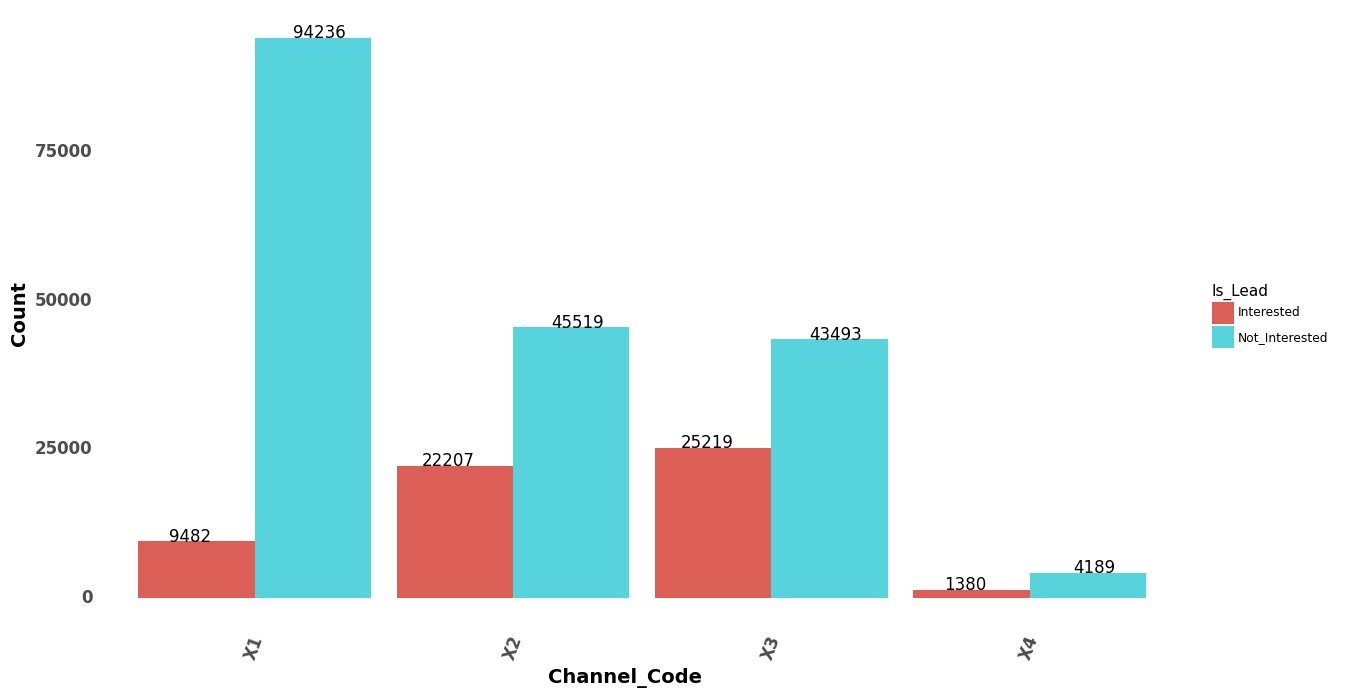

<ggplot: (8749875995341)>

In [ ]:
(ggplot(train,aes(x='Channel_Code',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=12,
stat='count',position=position_dodge(width=1))+
labs(x='Channel_Code',y='Count')+
#facet_wrap('Occupation',ncol=1)+
theme_dark()+
theme(figure_size=(14,8),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above-stacked bar chart explains that most customers have interacted with the bank through channel **X1**.

#### The customers who are used channel **X3** to interact with the banks are highly interested in recommended credit cards.

### Let's see if there is any difference in the channel of interacting with the bank by gender. Also, let's see is there any change in the customer's interest.

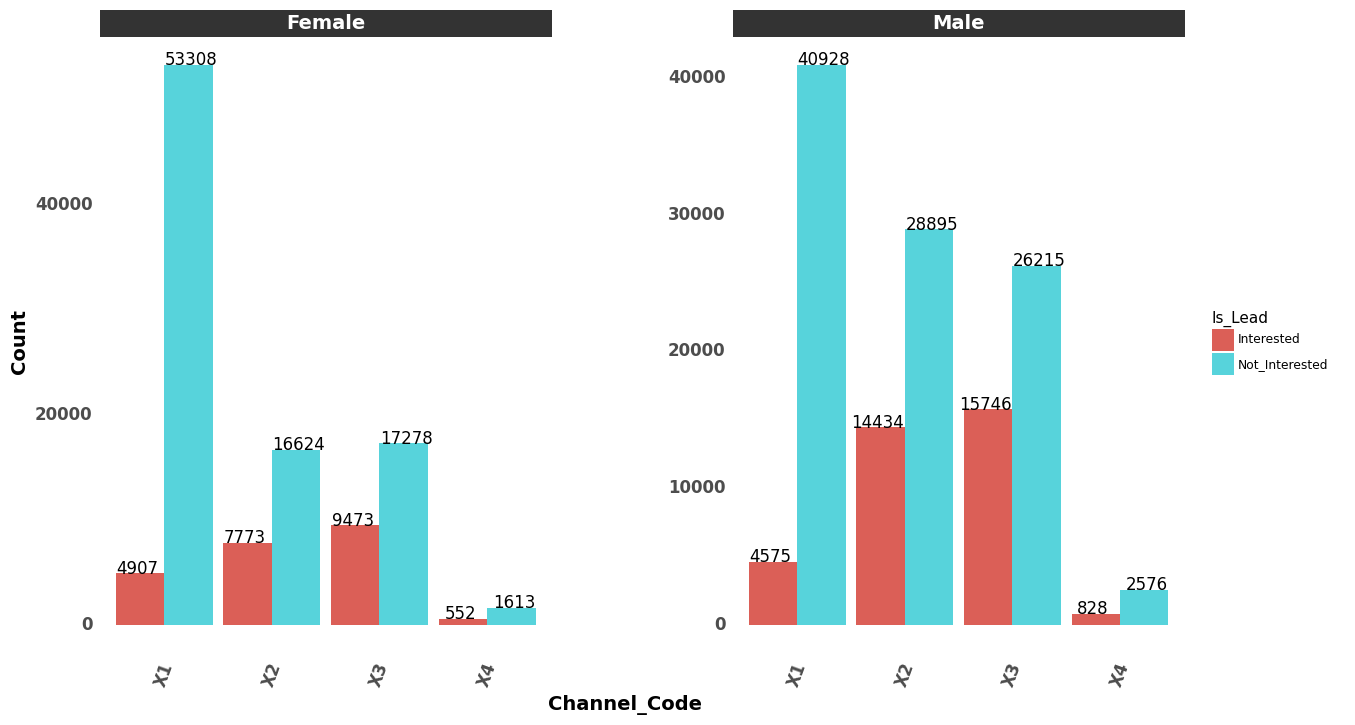

<ggplot: (8749877671021)>

In [ ]:
(ggplot(train,aes(x='Channel_Code',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=12,
stat='count',position=position_dodge(width=1))+
labs(x='Channel_Code',y='Count')+
facet_wrap('Gender',ncol=2,scales='free')+
theme_dark()+
theme(figure_size=(14,8),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above dodge bar explains that more number customers are using the **X1** channel to interact with the bank. In that, most of them are females and also show a higher interest than male customers in recommended credit cards.

#### More number of interested customer using **X2 and X3** to interact with the bank.

### Let's see the way of interacting with the bank changes will base on the gender-wise customer's occupations?

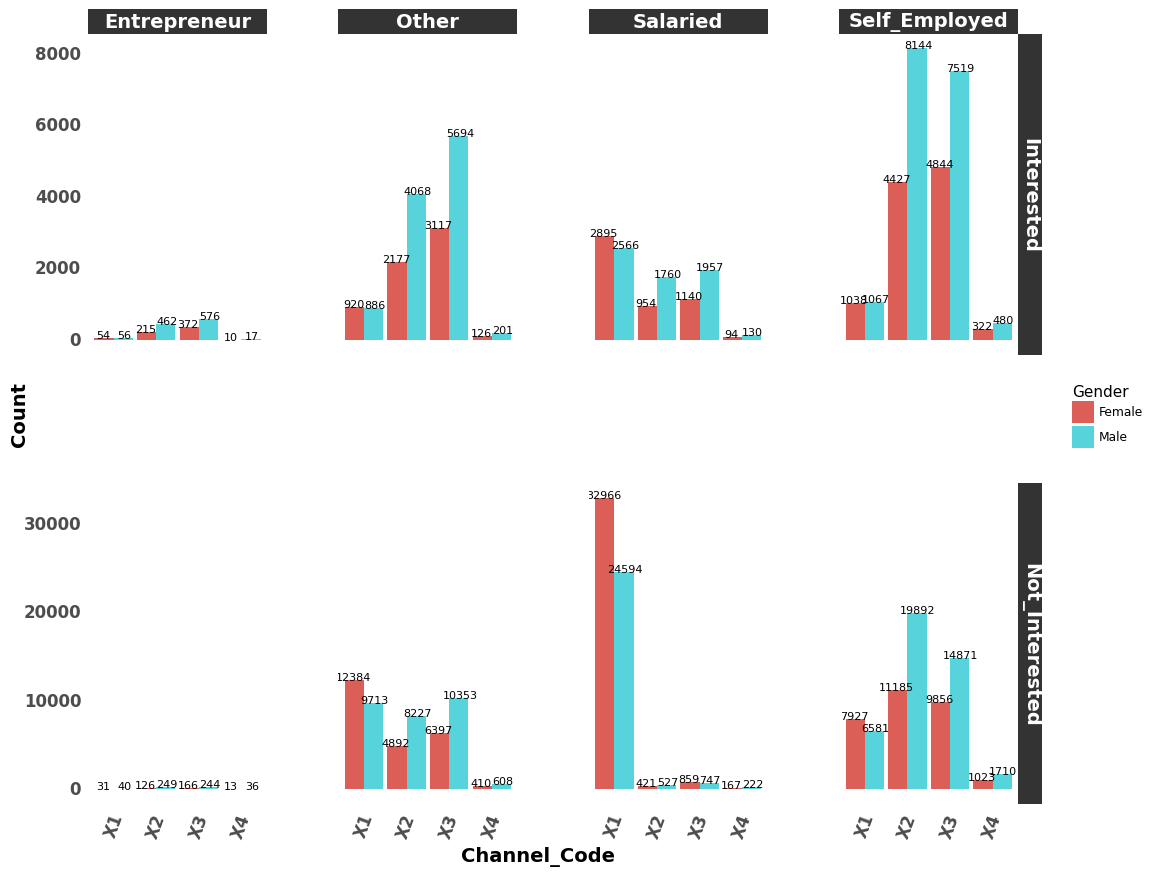

<ggplot: (8749877897353)>

In [ ]:
(ggplot(train,aes(x='Channel_Code',fill='Gender'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=8,
stat='count',position=position_dodge(width=1))+
labs(x='Channel_Code',y='Count')+
facet_grid('Is_Lead~Occupation',scales='free')+
theme_dark()+
theme(figure_size=(12,10),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above facet bar chart explains that the salaried customers are mostly using the X1 channel to interact with the bank.

#### Self_employed customers are mostly using the channel X2, X3 to interact with the bank.

#### Customer's who are having other occupations are mostly using X1, X2, and X3 channels to interact with the bank.

### Let's see various age groups of customers and their channel of communication to the bank.

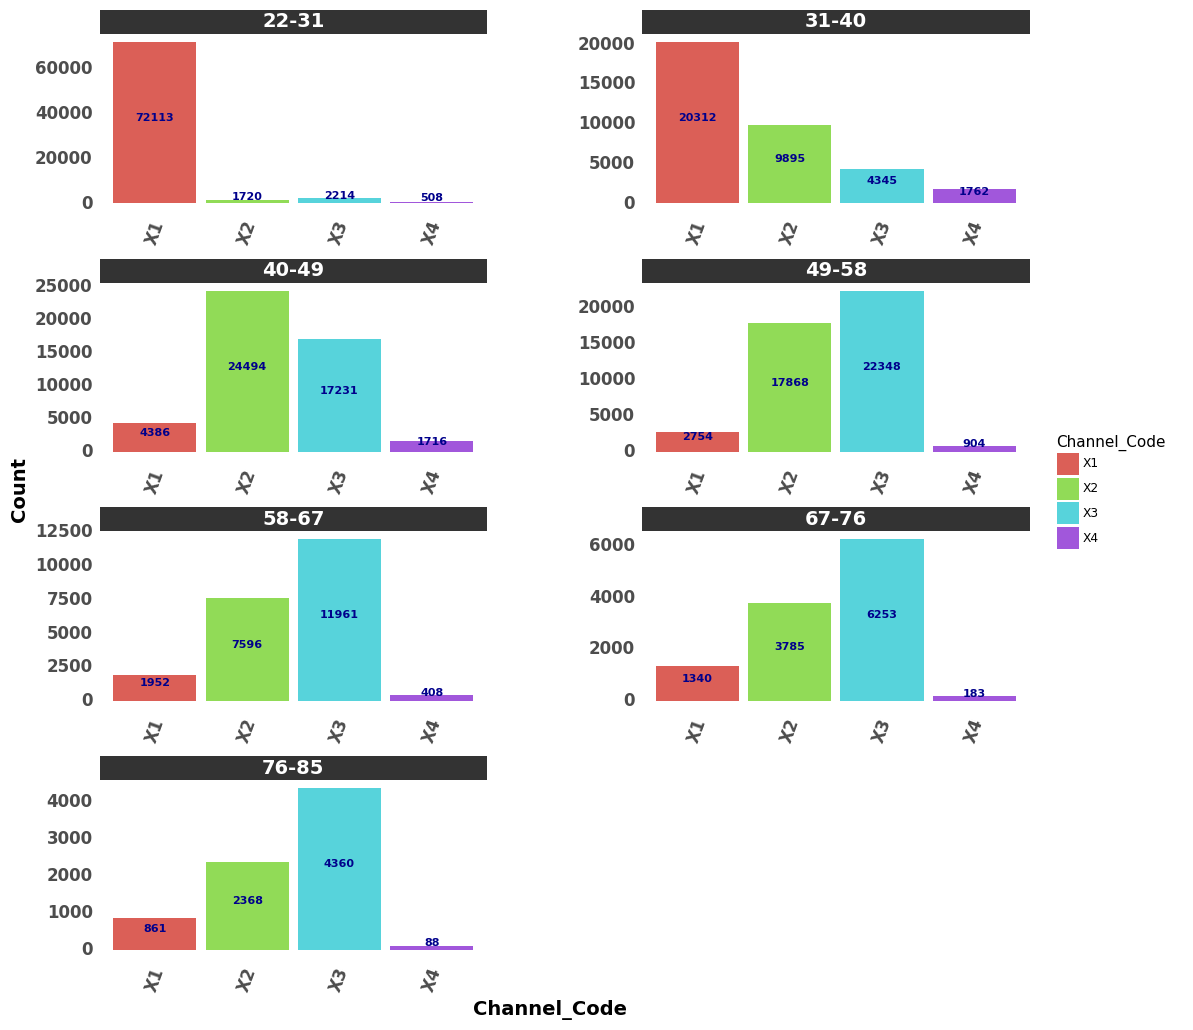

<ggplot: (8749877897677)>

In [ ]:
(ggplot(train,aes(x='Channel_Code',fill='Channel_Code'))+
geom_bar()+
geom_text(
aes(label=after_stat('count')),va='bottom',size=8,
color='darkblue',fontweight='bold',
stat='count',position=position_stack(vjust=0.5))+
labs(y='Count')+
facet_wrap('age_bin',ncol=2,scales='free')+
theme_dark()+
theme(figure_size=(12,12),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))


#### The above bar chart explains that the customers who are in the age range 22 to 31 are mostly using channel X1 to interact with the bank.

#### 40 years and old age customers are mostly using X2 and X3 channels to interact with the bank.

### Let's see which channel of interaction is popular in all the regions.

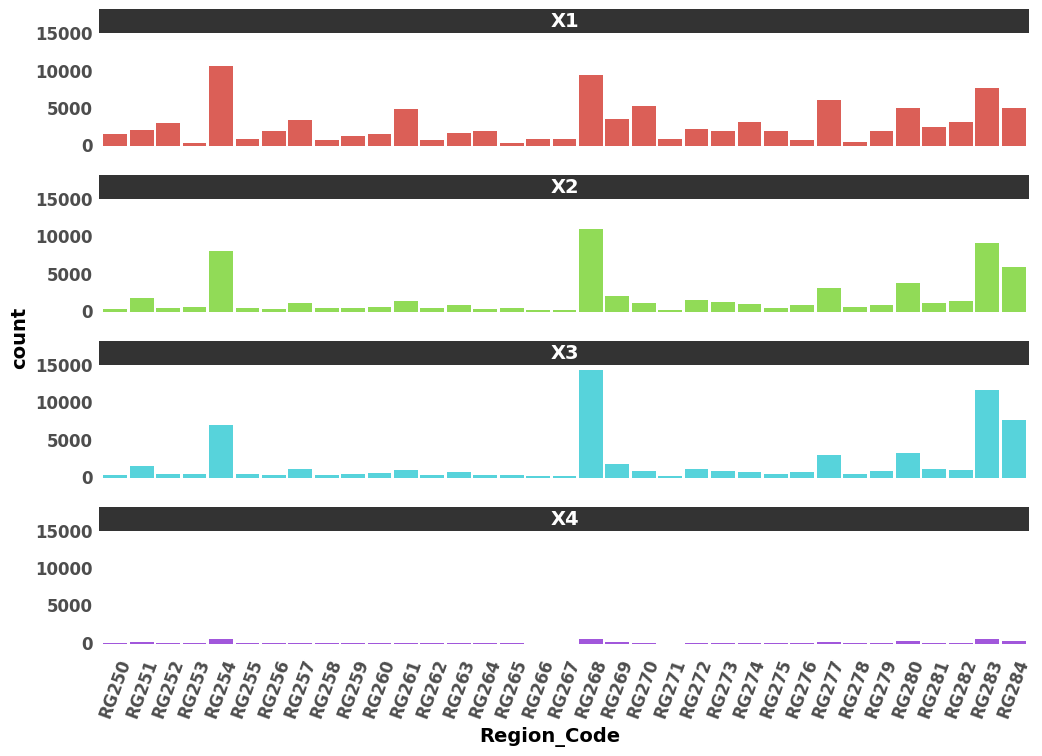

<ggplot: (8749875284681)>

In [ ]:
(ggplot(train,aes(x='Region_Code',fill='Channel_Code'))+
geom_bar()+
facet_wrap('Channel_Code',ncol=1)+
theme_dark()+
theme(figure_size=(12,8),
legend_position='none',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))



#### The customers who are from regions 253,268,283,284 are mostly using X1, X2, and X3 channels to interact with the bank.


#### Let's see how long been the customers are in the bank's book and see their response pattern on recommended credit cards.

#### The vintage details in months so let's convert it into year format.

In [ ]:
#month to year conversion
def mon_to_yr(col):
  """
  if month is greater than or equal to 12 divide by 12 else return the input value
  """
  if col>=12:
    return round(col/12,1)
  else:
    return col/10


In [ ]:
train['vintage_yr']=train['Vintage'].apply(mon_to_yr)

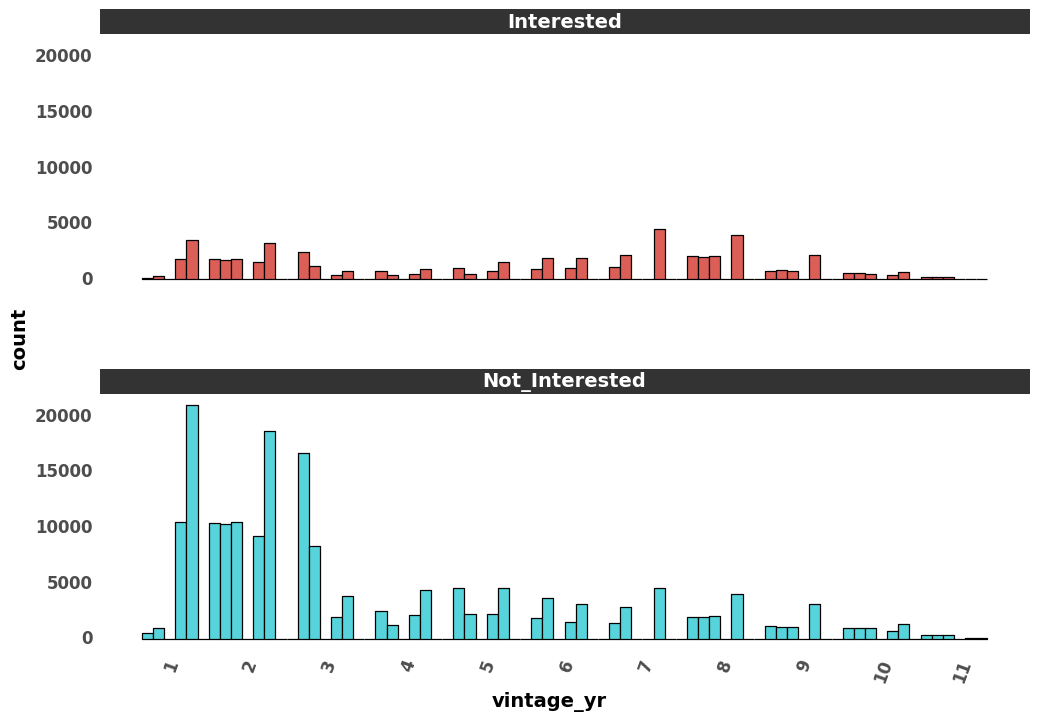

<ggplot: (8749875623205)>

In [ ]:
vintage_bin=bin_w(train['vintage_yr'])
(ggplot(train,aes(x='vintage_yr',fill='Is_Lead'))+
geom_histogram(binwidth=vintage_bin,color='black')+
scale_x_continuous(breaks=range(0,15,1))+
facet_wrap('Is_Lead',ncol=1)+
theme_dark()+
theme(figure_size=(12,8),
legend_position='none',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'), 
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))


#### The above histogram explains that the customers who have been in bank books for 1 to 3 years and 1 to 8 year means they are highly interested in recommended credit cards.

#### Most of the eligible customers are have been in the bank book's are 1 to 3 years.

#### Let's bin the vintage years by using pandas cut.

In [ ]:
train['vintage_yr_bin']=pd.cut(train['vintage_yr'],bins=5 ,labels=['0.7-2.8','2.8-4.9','4.9-7.0','7.0-9.1','9.1-11.2'])

#### Let's compare gender-wise customer responses with vintage year category.

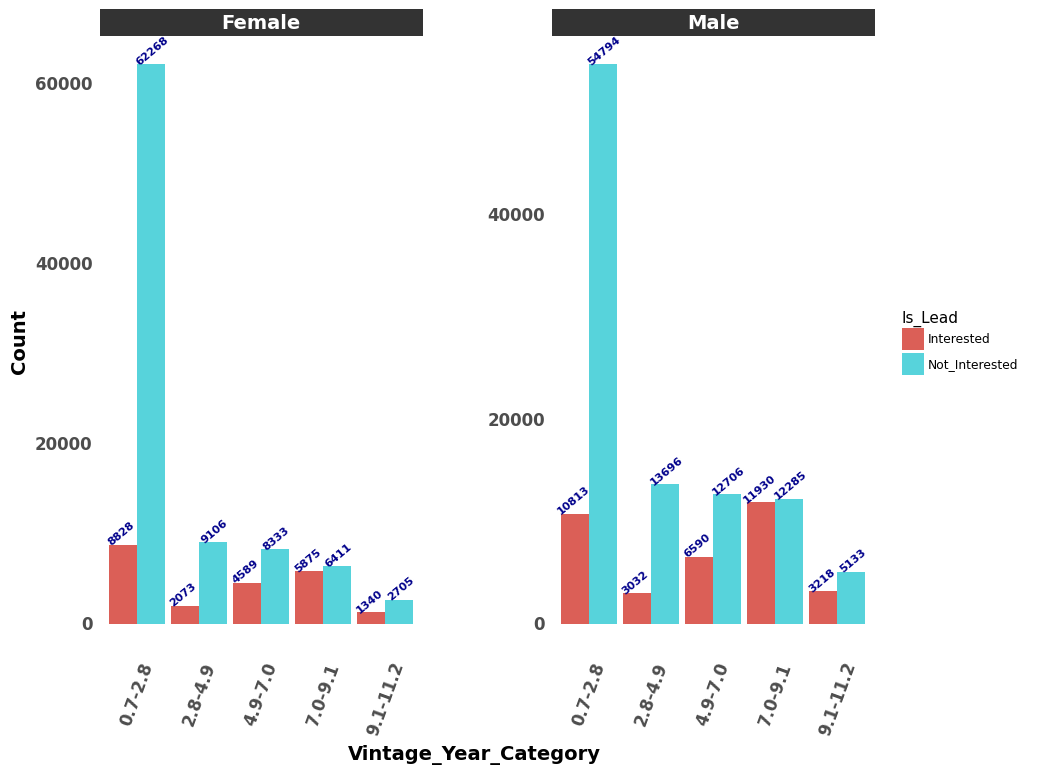

<ggplot: (8749875206281)>

In [ ]:
(ggplot(train,aes(x='vintage_yr_bin',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=8,
color='darkblue',fontweight='bold',angle=40,
stat='count',position=position_dodge(width=1))+
labs(x='Vintage_Year_Category',y='Count')+
facet_wrap('Gender',ncol=2,scales='free')+
theme_dark()+
theme(figure_size=(10,8),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains more eligible customers are who have been in the category of 7 months to 3 years.

#### The male customers who have been in the bank for 7 to 9 years are highly interested in recommended credit cards.

### Let's compare the gender-wise customer age category with vintage year category.

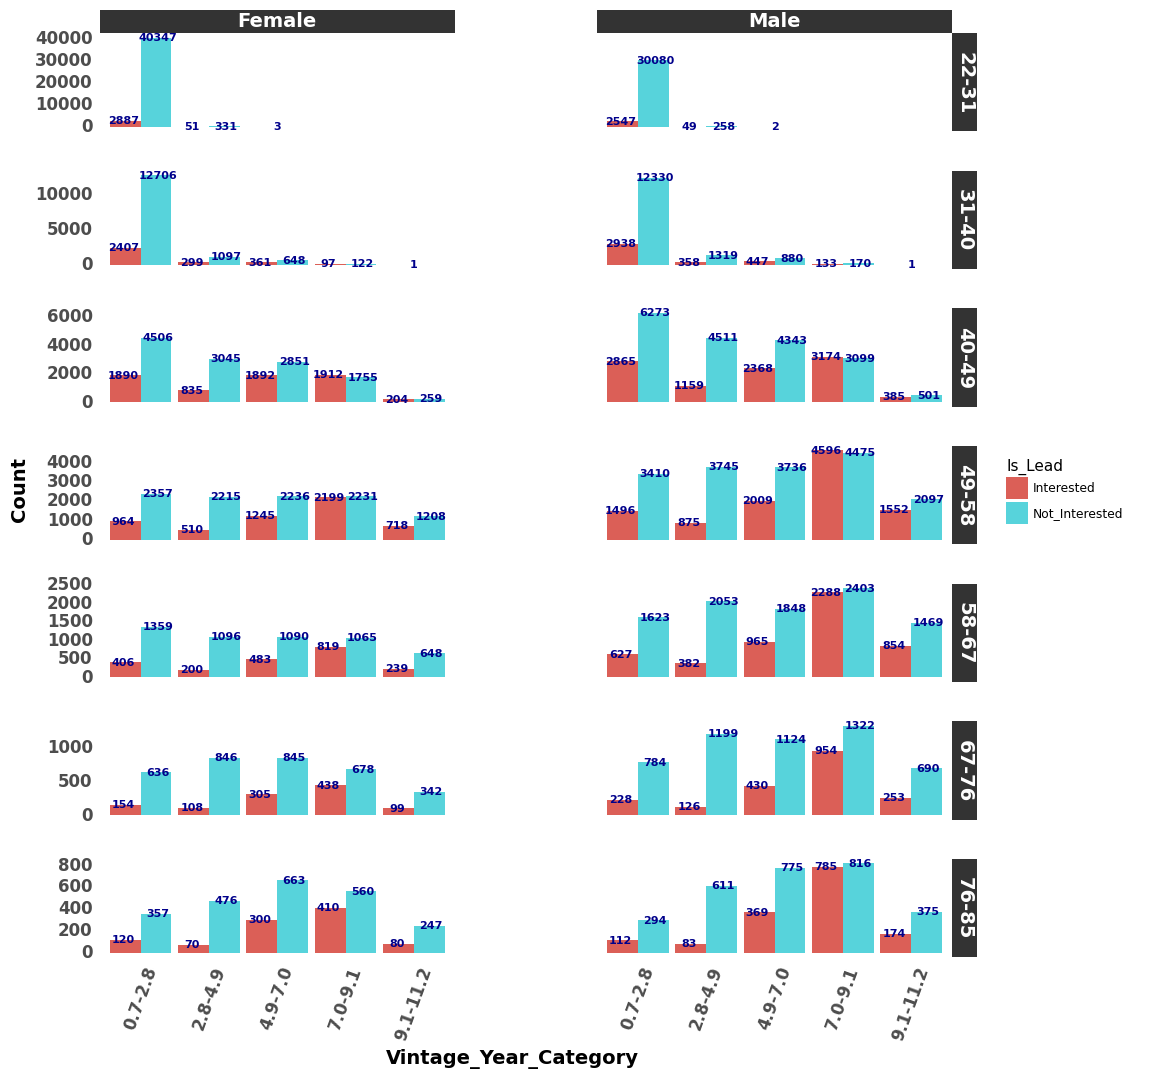

<ggplot: (8749875200901)>

In [ ]:
(ggplot(train,aes(x='vintage_yr_bin',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='center',size=8,
color='darkblue',fontweight='bold',
stat='count',position=position_dodge(width=1))+
labs(x='Vintage_Year_Category',y='Count')+
facet_grid('age_bin~Gender',scales='free')+
theme_dark()+
theme(figure_size=(11,12),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above dodge bar chart explains that the customers who are 40 years and above are have been in the bank books for 7 to 9 years and showing higher interest in recommended credit cards.

#### Let's see if the customer has any previous loans.

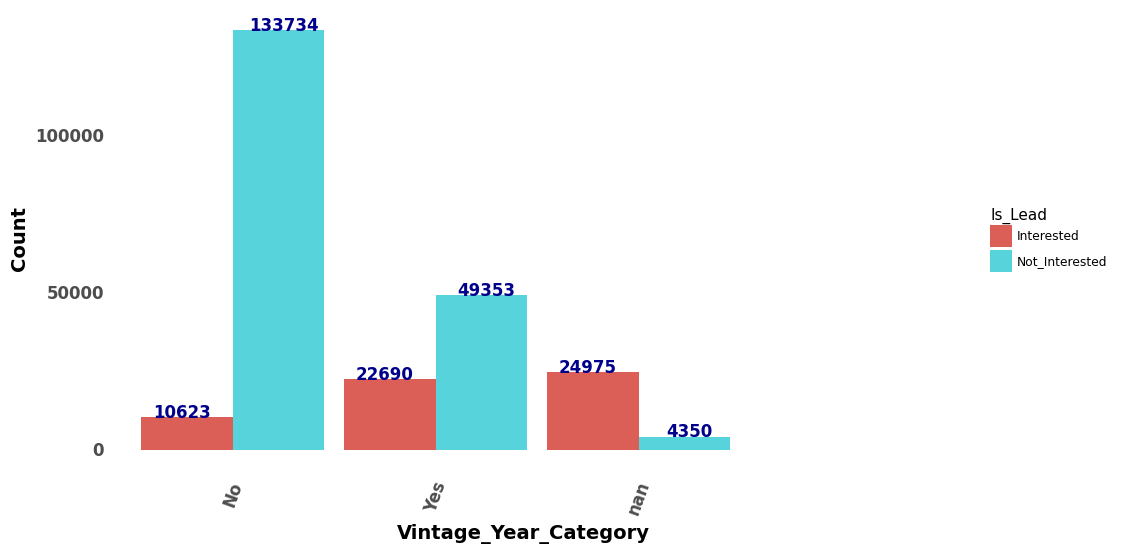

<ggplot: (8749875058029)>

In [ ]:
(ggplot(train,aes(x='Credit_Product',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=12,
color='darkblue',fontweight='bold',
stat='count',position=position_dodge(width=1))+
labs(x='Vintage_Year_Category',y='Count')+
theme_dark()+
theme(figure_size=(11,6),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))


#### The above dodge bar chart explains that if the customer has any previous loans means they are highly interested in recommended credit cards.

#### There are 29325 previous loan informations are missing.

### Let's compare customer's previous loan details with their occupations.

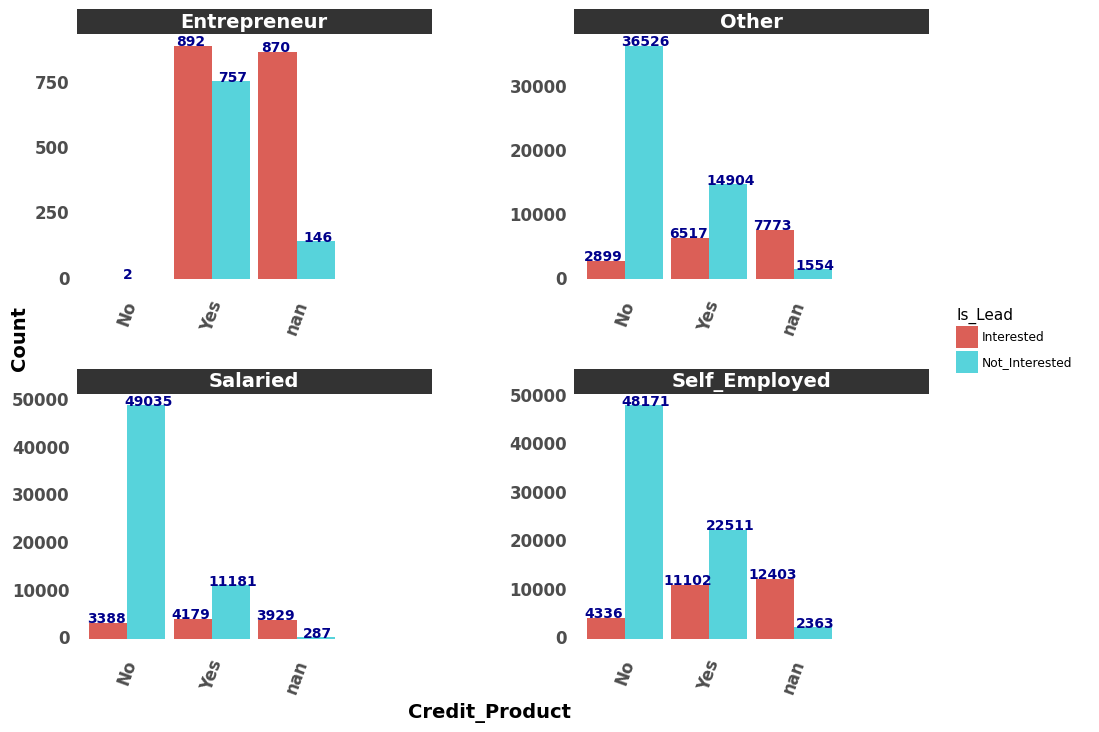

<ggplot: (8749875025001)>

In [ ]:
(ggplot(train,aes(x='Credit_Product',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=10,
color='darkblue',fontweight='bold',
stat='count',position=position_dodge(width=1))+
facet_wrap('Occupation',ncol=2,scales='free')+
labs(y='Count')+
theme_dark()+
theme(figure_size=(11,8),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))



#### The above chart explains that the entrepreneur customers are having fewer previous loans than customers who are having other occupations.

#### self-employed customers are having a high number of previous loans.

### Let's see which region customers have the highest previous loans.

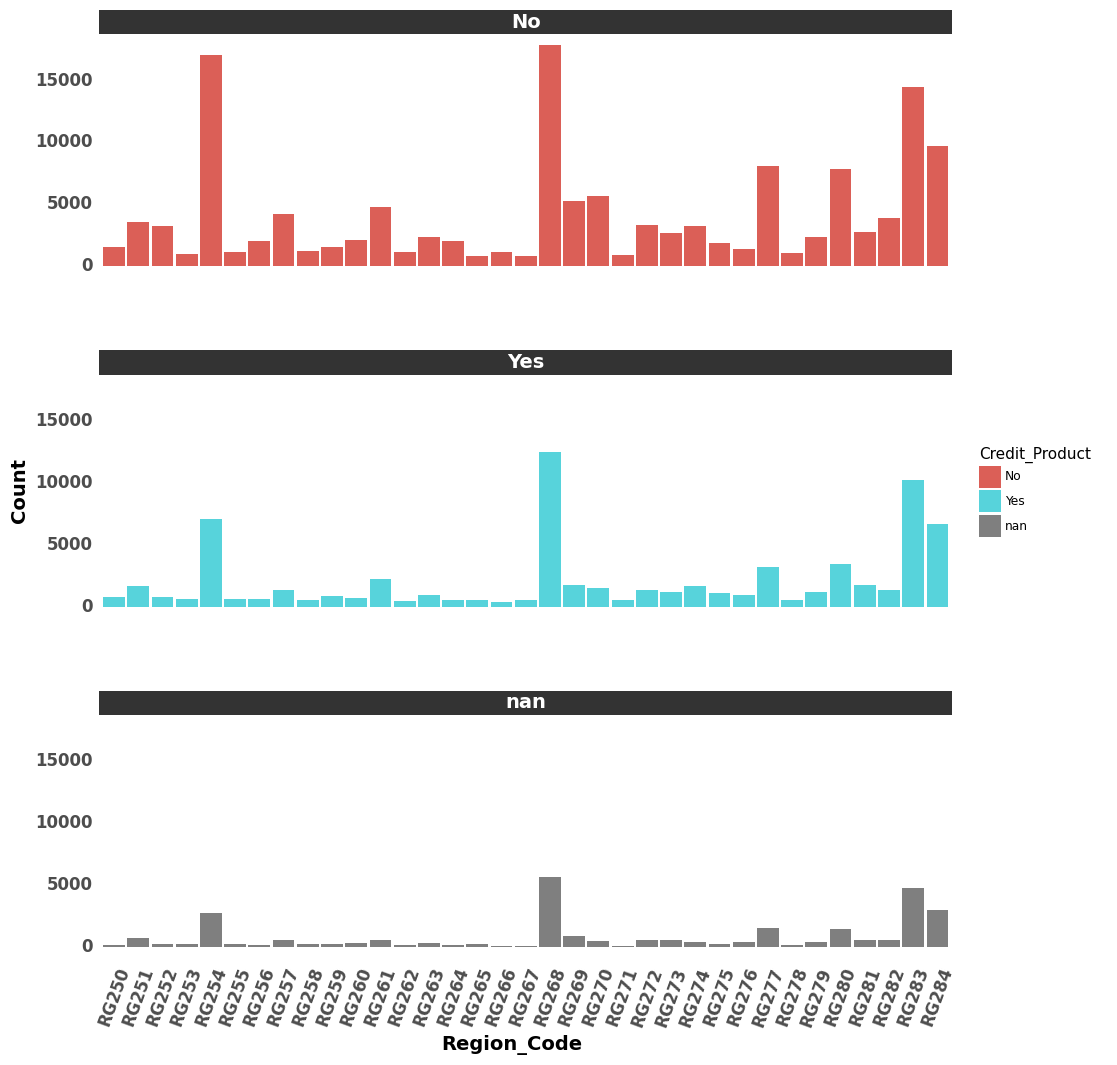

<ggplot: (8788468641457)>

In [10]:
(ggplot(train,aes(x='Region_Code',fill='Credit_Product'))+
geom_bar(position='dodge')+
facet_wrap('Credit_Product',ncol=1)+
labs(y='Count')+
theme_dark()+
theme(figure_size=(11,12),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### customers who are from regions 254, 268, and 283 having a higher number of previous loans in the bank.

### Let's see customer's average account balance distribution using histogram.

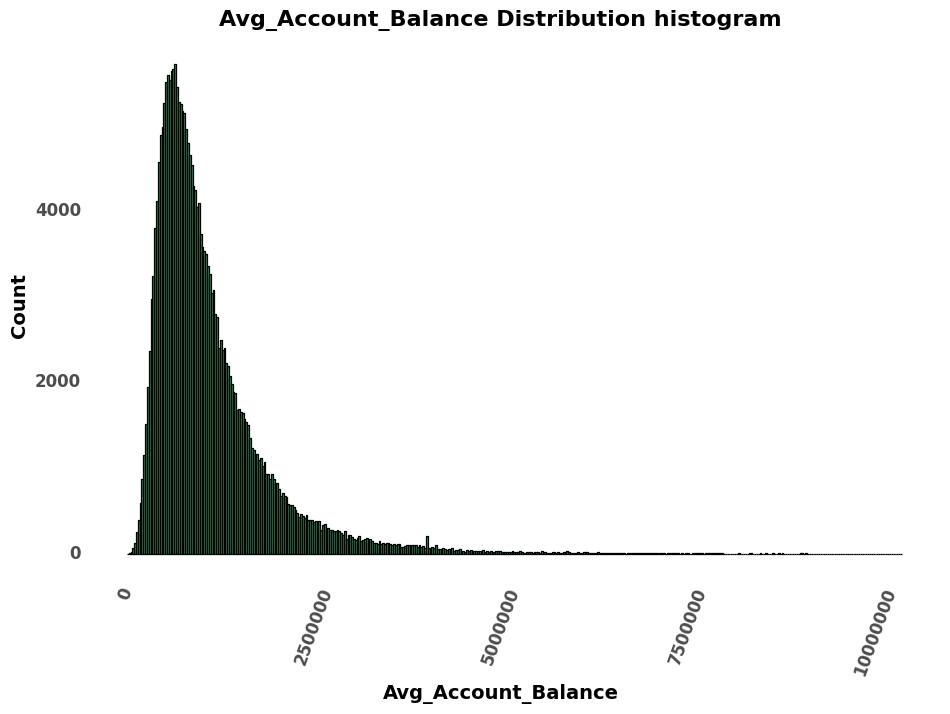

<ggplot: (8749875916341)>

In [ ]:
#optimal bin width for Avg_Account_Balance

avg_bal_bin=bin_w(train['Avg_Account_Balance'])

(ggplot(train,aes(x='Avg_Account_Balance'))+
geom_histogram(binwidth=avg_bal_bin,fill='seagreen',color='black')+
labs(y='Count',title='Avg_Account_Balance Distribution histogram')+
theme_dark()+
theme(figure_size=(11,7),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

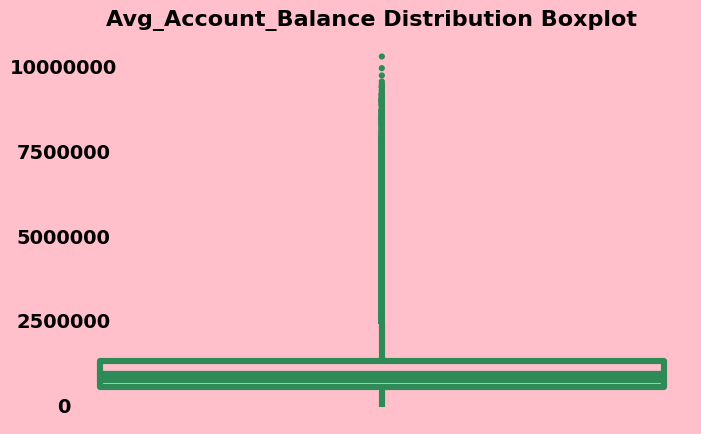

<ggplot: (8749875365625)>

In [ ]:
(ggplot(train,aes(x='0',y='Avg_Account_Balance'))+
geom_boxplot(color='seagreen',fill='none',size=2.5)+
labs(x='',y='',title="Avg_Account_Balance Distribution Boxplot")+
theme_void()+
theme(figure_size=(8,5),
panel_grid=element_blank(),
axis_ticks=element_blank(), 
plot_background=element_rect(fill='pink'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_y=element_text(style='normal',size=14,weight='bold'),
axis_text_x=element_blank(),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [ ]:
print("The Avg_Account_Balance Median is:",train['Avg_Account_Balance'].median())

The Median is: 894601.0


In [ ]:
print("The Avg_Account_Balance Mode is:",st.mode(train['Avg_Account_Balance']))

The Mode is: 4022185


In [ ]:
print('Avg_Account_Balance Summary\n',train['Avg_Account_Balance'].describe())

Number Summary
 count    2.457250e+05
mean     1.128403e+06
std      8.529364e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      1.035201e+07
Name: Avg_Account_Balance, dtype: float64


#### The above histogram shows that the customer's Avg_Account_Balance distribution right skewed.

#### The boxplot shows there are **ouliers**.

### Let's see if there is any difference in customer Avg_Account_Balance distribution and their responses on recommended credit card categories.

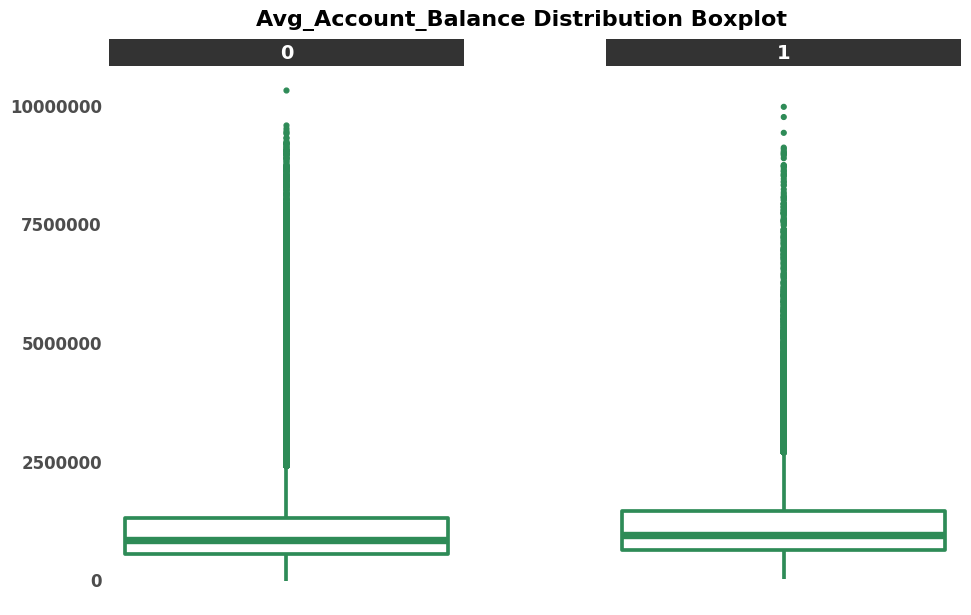

<ggplot: (8778542330905)>

In [ ]:
(ggplot(train,aes(x='0',y='Avg_Account_Balance'))+
geom_boxplot(color='seagreen',fill='none',size=1.5)+
labs(x='',y='',title="Avg_Account_Balance Distribution Boxplot")+
facet_wrap('Is_Lead')+
theme_dark()+
theme(figure_size=(11,7),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_blank(),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [ ]:
train.groupby(['Is_Lead'])['Avg_Account_Balance'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
Is_Lead,,,,,
0,20790,1.103018e+06,869263.0,10352009,847248.539860
1,45950,1.210034e+06,981598.5,10007678,865952.806823


#### The above histogram shows that there is no significant change in both balance distributions.

### Let's see is there a difference in customer average balance based on their type of occupation.

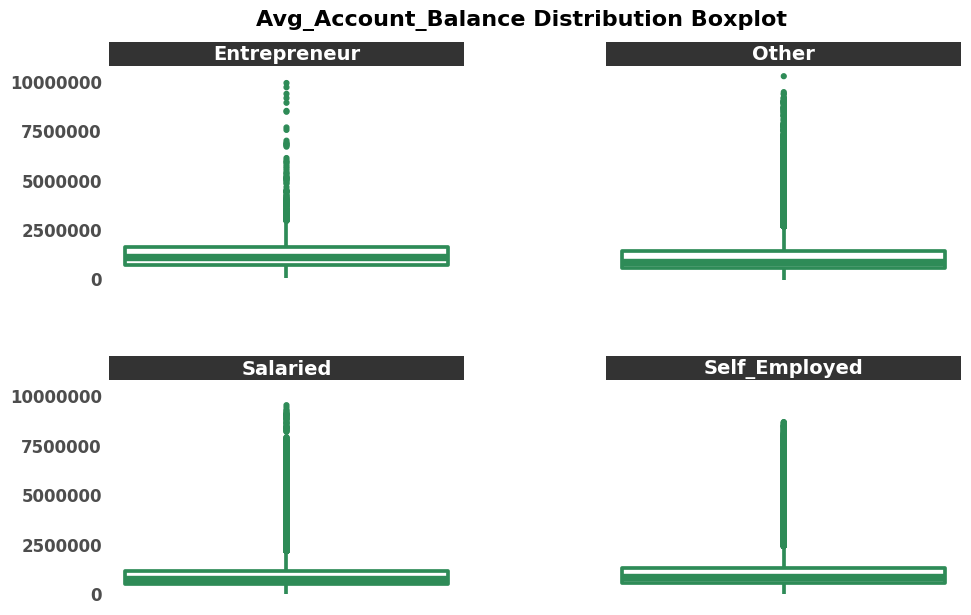

<ggplot: (8778547944097)>

In [ ]:
(ggplot(train,aes(x='0',y='Avg_Account_Balance'))+
geom_boxplot(color='seagreen',fill='none',size=1.5)+
labs(x='',y='',title="Avg_Account_Balance Distribution Boxplot")+
facet_wrap('Occupation')+
theme_dark()+
theme(figure_size=(11,7),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_blank(),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [ ]:
train.groupby(['Occupation'])['Avg_Account_Balance'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
Occupation,,,,,
Entrepreneur,157245,1.415043e+06,1182890,10007678,989105.065434
Other,20790,1.209870e+06,959188,10352009,908245.700519
Salaried,45950,1.033420e+06,811991,9614883,802216.647443
Self_Employed,47526,1.131946e+06,909072,8762071,836546.756687


### Let's see how many customers have been active in the past 3 months.

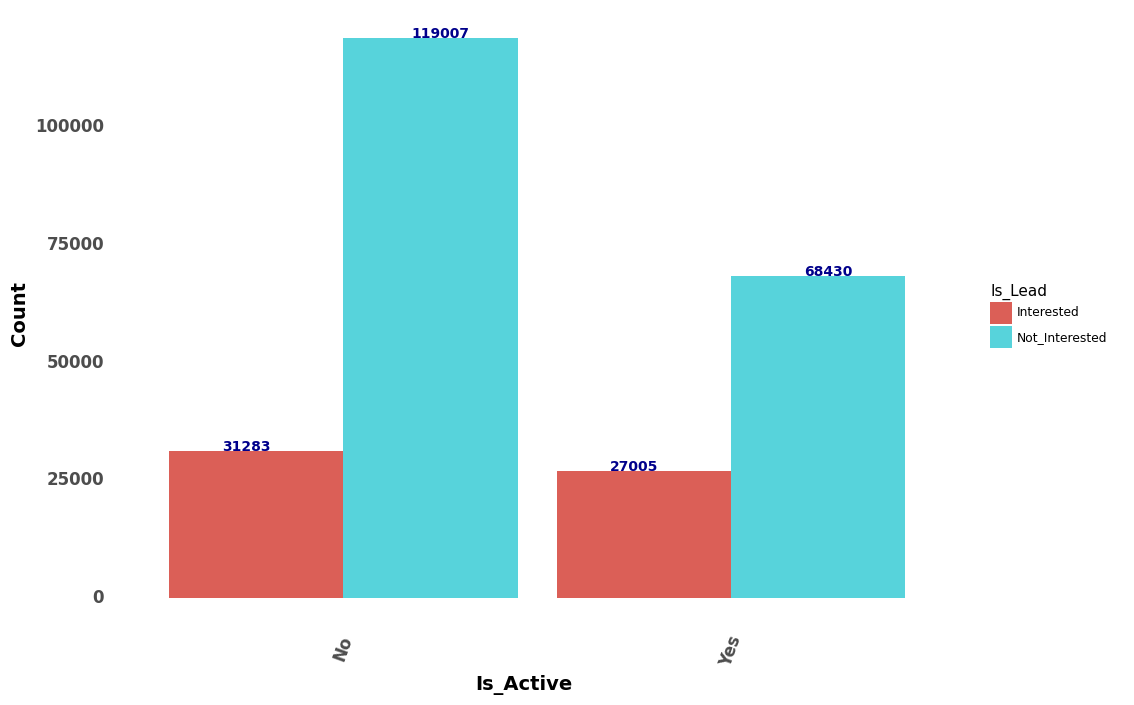

<ggplot: (8788468450465)>

In [11]:
(ggplot(train,aes(x='Is_Active',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=10,
color='darkblue',fontweight='bold',
stat='count',position=position_dodge(width=1))+
labs(y='Count')+
theme_dark()+
theme(figure_size=(11,8),
legend_position='right',  
panel_grid=element_blank(),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above dodge bar chart explains that the customers who have not been active in the past three months are highly interested in recommended credit cards.

#### Let's see customer's occupation-wise how many of them are have been active in the past 3 months and see their responses in recommended credit cards.

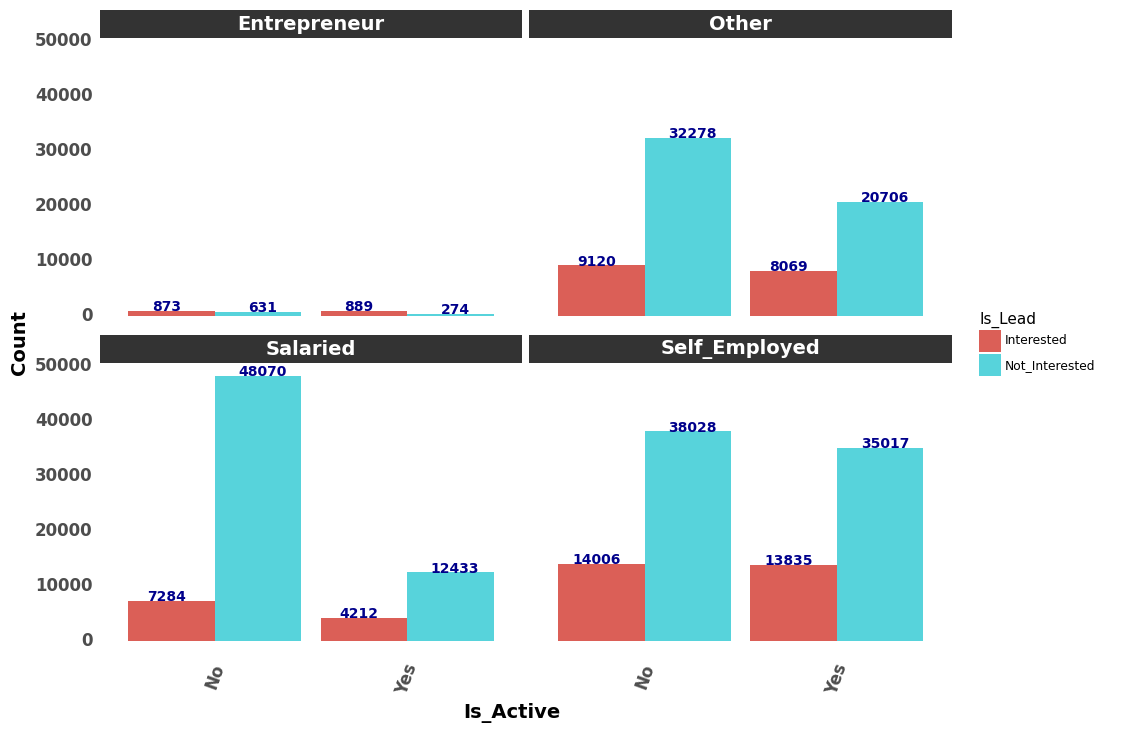

<ggplot: (8788468403381)>

In [12]:
(ggplot(train,aes(x='Is_Active',fill='Is_Lead'))+
geom_bar(position='dodge')+
geom_text(
aes(label=after_stat('count')),va='baseline',size=10,
color='darkblue',fontweight='bold',
stat='count',position=position_dodge(width=1))+
facet_wrap('Occupation')+
labs(y='Count')+
theme_dark()+
theme(figure_size=(11,8),
legend_position='right',  
panel_grid=element_blank(),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_text(style='normal',size=12,weight='bold',rotation=70),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above dodge bar chart explains that the customers who are self-employed and have not been active in the past 3 months are highly interested in recommended credit cards.

### Let's compare the customer's past three months' account activity and their average account balance.

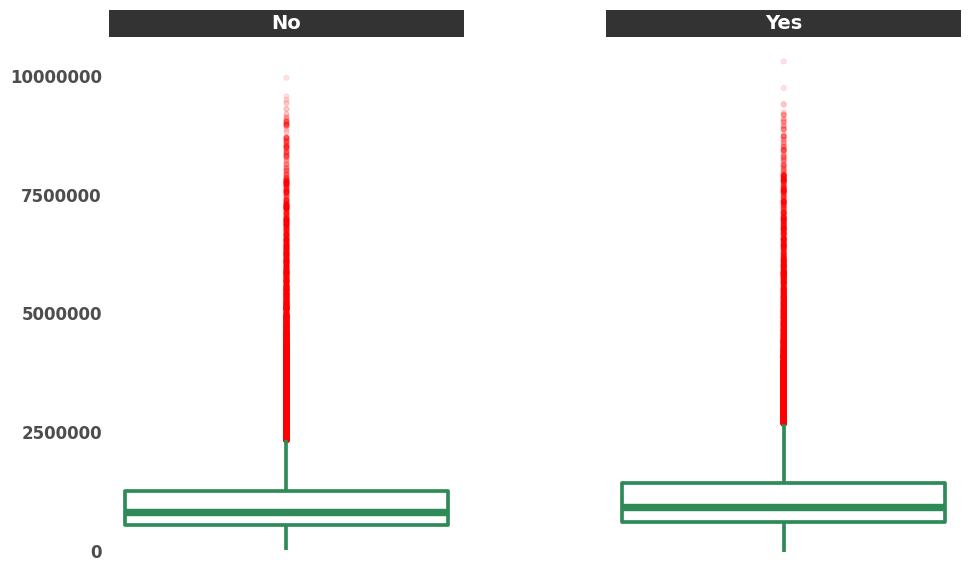

<ggplot: (8778547370645)>

In [ ]:
(ggplot(train,aes(x='0',y='Avg_Account_Balance'))+
geom_boxplot(color='seagreen',fill='none',size=1.5,outlier_color='red',outlier_alpha=0.1)+
labs(x='',y='')+
facet_wrap('Is_Active')+
theme_dark()+
theme(figure_size=(11,7),
legend_position='right',  
panel_grid=element_blank(),
subplots_adjust={'hspace': 0.4,'wspace': 0.4},
#plot_background=element_rect(fill='lightgrey'),
panel_background=element_rect(fill='none'),    
plot_title=element_text(style='normal',size=16,weight='bold'),      
axis_text_x=element_blank(),
axis_text_y=element_text(style='normal',size=12,weight='bold'),    
axis_ticks=element_blank(),
legend_background=element_blank(),    
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [ ]:
train.groupby(['Is_Active'])['Avg_Account_Balance'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
Is_Active,,,,,
No,45657,1.076315e+06,854315,10007678,813232.005797
Yes,20790,1.210431e+06,965694,10352009,905917.117346


#### The above boxplot explains that there is a difference between the customer's average balance and the past 3 months' account activity.

### Let's analyze the missing values

In [ ]:
import missingno as msno

In [18]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
age_bin                    0
dtype: int64

#### Credit product column has 29325 missing values.

#### Dendrogram-reveals deeper trend than pair-wise analysis heatmap

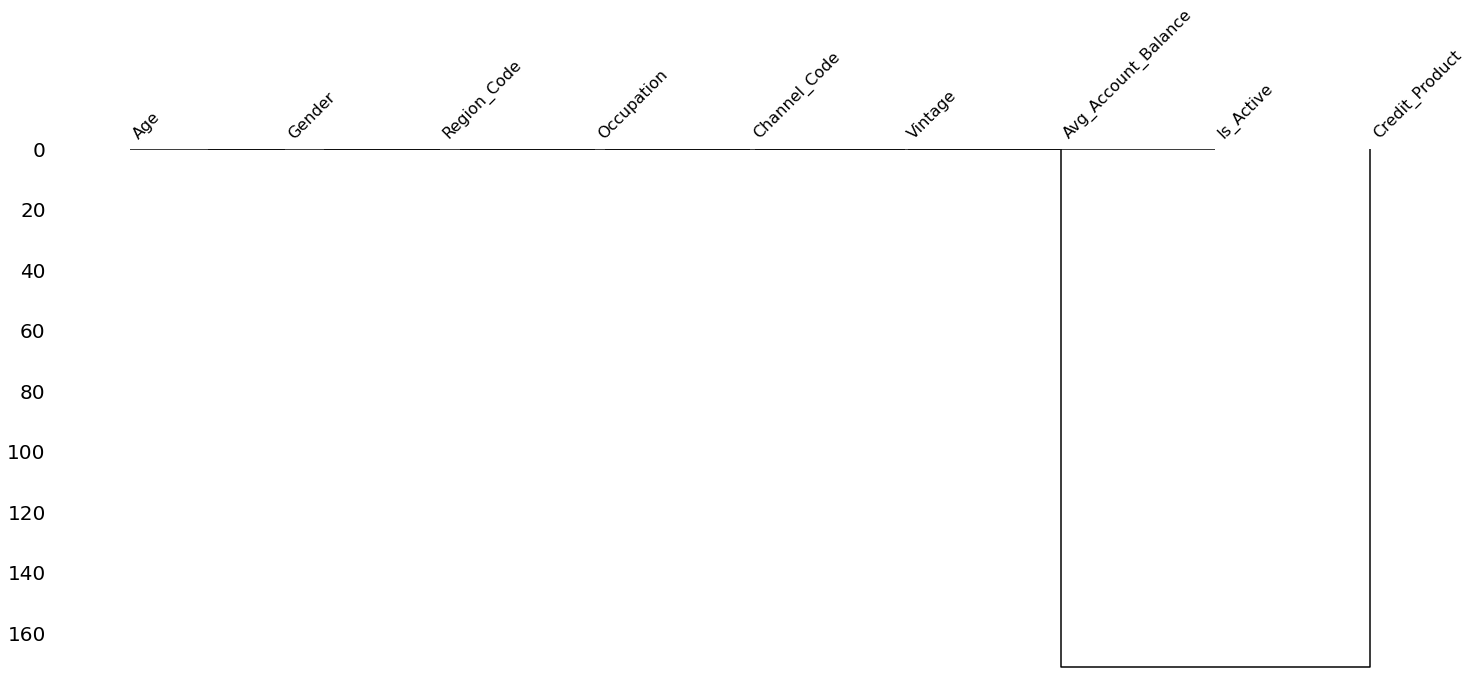

In [ ]:
msno.dendrogram(train.iloc[:,1:10])

#### The dendrogram explains that the column credit product and other column has the highest distance so cannot predict the missing value based on the other columns.